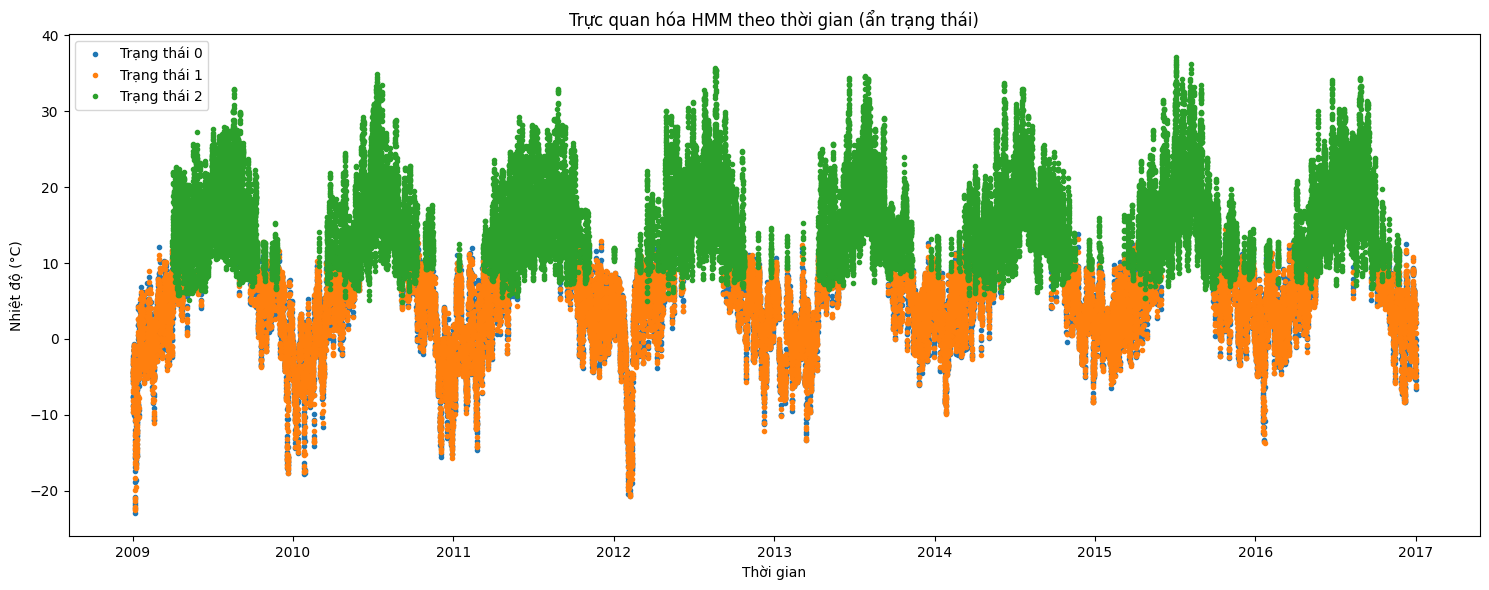

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM
from sklearn.preprocessing import StandardScaler

# Bước 1: Đọc dữ liệu
df = pd.read_csv('jena_climate_2009_2016.csv')
df['Date Time'] = pd.to_datetime(df['Date Time'], dayfirst=True)
df = df[['Date Time', 'T (degC)']].dropna()

# Bước 2: Lấy mẫu dữ liệu (để giảm thời gian xử lý)
df = df.iloc[::6, :]  # Lấy mỗi 6 giờ 1 điểm

# Bước 3: Chuẩn hóa dữ liệu
scaler = StandardScaler()
X = scaler.fit_transform(df[['T (degC)']].values)

# Bước 4: Huấn luyện mô hình HMM (3 trạng thái ẩn)
model = GaussianHMM(n_components=3, covariance_type="diag", n_iter=1000, random_state=42)
model.fit(X)

# Bước 5: Dự đoán trạng thái ẩn
hidden_states = model.predict(X)

# Bước 6: Trực quan hóa theo thời gian
plt.figure(figsize=(15,6))
for i in range(model.n_components):
    state = (hidden_states == i)
    plt.plot(df['Date Time'].values[state], df['T (degC)'].values[state], '.', label=f'Trạng thái {i}')
    
plt.xlabel('Thời gian')
plt.ylabel('Nhiệt độ (°C)')
plt.title('Trực quan hóa HMM theo thời gian (ẩn trạng thái)')
plt.legend()
plt.tight_layout()
plt.show()